In [2]:
from ELreasoner.resources import parser, formatter, elFactory, gateway_class
from ELreasoner.reasoner import compute_subsumers_of_class
import time

In [3]:
ontology_path = "/Users/michele/computer_science/code/Knowlege_Representation_Assigment/analysis/amino-acid.amino-acid-ontology.2.owl.xml"

In [4]:
ontology = parser.parseFile(ontology_path)

In [5]:
# get concept names
conceptNames = ontology.getConceptNames()
subsumers_per_concept = dict()
execution_time_per_concept = dict()

for conceptName in conceptNames:
    print(f"Computing subsumers of {formatter.format(conceptName)}")
    start_time = time.perf_counter()
    subsumers = compute_subsumers_of_class(conceptName, ontology)
    end_time = time.perf_counter()
    execution_time_per_concept[formatter.format(conceptName)] = (end_time - start_time)*1000
    subsumers_per_concept[formatter.format(conceptName)] = [formatter.format(subsumer) for subsumer in subsumers]

Computing subsumers of TinyPolarAminoAcid
Computing subsumers of Size
Computing subsumers of I
Computing subsumers of Hydrophobicity
Computing subsumers of Q
Computing subsumers of Positive
Computing subsumers of Neutral
Computing subsumers of Large
Computing subsumers of AliphaticAminoAcid
Computing subsumers of Non-Polar
Computing subsumers of M
Computing subsumers of LargeAliphaticAminoAcid
Computing subsumers of RefiningFeature
Computing subsumers of W
Computing subsumers of Aliphatic
Computing subsumers of Y
Computing subsumers of Tiny
Computing subsumers of Polar
Computing subsumers of SideChainStructure
Computing subsumers of C
Computing subsumers of E
Computing subsumers of Hydrophobic
Computing subsumers of NegativeChargedAminoAcid
Computing subsumers of R
Computing subsumers of V
Computing subsumers of T
Computing subsumers of S
Computing subsumers of N
Computing subsumers of AromaticAminoAcid
Computing subsumers of A
Computing subsumers of Charge
Computing subsumers of Posit

In [70]:
subsumers_per_concept

{'NamedSushi': ['NamedSushi', 'Food', 'Sushi'],
 'VegetarianIngredient': ['VegetarianIngredient', 'Food', 'SushiIngredient'],
 'Maki': ['NamedSushi', 'Maki', 'Food', 'Sushi'],
 'Food': ['Food'],
 'Raw': ['Raw', 'CookingStyle', 'IngredientCharacteristic'],
 'Vegetable': ['Food', 'Vegetable', 'SushiIngredient'],
 'Sushi': ['Food', 'Sushi'],
 'KappaMaki': ['NamedSushi',
  'Maki',
  'Food',
  'Sushi',
  'KappaMaki',
  'RealJapaneseSushi'],
 'SashimiTuna': ['NamedSushi',
  'Food',
  'Sushi',
  'SashimiTuna',
  'Sashimi',
  'RealJapaneseSushi'],
 'Sesame': ['Food', 'Sesame', 'Grain', 'SushiIngredient'],
 'TemakiSake': ['NamedSushi',
  'Maki',
  'Food',
  'Sushi',
  'TemakiSake',
  'Temaki',
  'RealJapaneseSushi'],
 'SimpleSushi': ['Food', 'Sushi', 'SimpleSushi'],
 'Mayonnaise': ['Food', 'Mayonnaise', 'SushiIngredient', 'Sauce'],
 'Mild': ['Mild', 'Spiciness', 'IngredientCharacteristic'],
 'Hot': ['Hot', 'Spiciness', 'IngredientCharacteristic'],
 'Avocado': ['Food', 'Avocado', 'SushiIngredien

In [6]:
gateway = gateway_class.gateway
elk = gateway.getELKReasoner()
hermit = gateway.getHermiTReasoner()

In [7]:
ontology = parser.parseFile(ontology_path)

In [8]:
conceptNames = ontology.getConceptNames()
ELK_subsumers_per_concept = dict()
Hermit_subsumers_per_concept = dict()
ELK_execution_time_per_concept = dict()
Hermit_execution_time_per_concept = dict()

for conceptName in conceptNames:
    print(f"Computing subsumers of {formatter.format(conceptName)}")
    
    start_time = time.perf_counter()
    elk.setOntology(ontology)
    subsumers = elk.getSubsumers(conceptName)
    end_time = time.perf_counter()
    ELK_execution_time_per_concept[formatter.format(conceptName)] = (end_time - start_time)*1000
    ELK_subsumers_per_concept[formatter.format(conceptName)] = [formatter.format(subsumer) for subsumer in subsumers.toArray()]

    
    
    start_time = time.perf_counter()
    hermit.setOntology(ontology)
    subsumers = hermit.getSubsumers(conceptName)
    end_time = time.perf_counter()
    Hermit_execution_time_per_concept[formatter.format(conceptName)] = (end_time - start_time)*1000
    Hermit_subsumers_per_concept[formatter.format(conceptName)] = [formatter.format(subsumer) for subsumer in subsumers.toArray()]
    
    

Computing subsumers of TinyPolarAminoAcid
Computing subsumers of Size
Computing subsumers of I
Computing subsumers of Hydrophobicity
Computing subsumers of Q
Computing subsumers of Positive
Computing subsumers of Neutral
Computing subsumers of Large
Computing subsumers of AliphaticAminoAcid
Computing subsumers of Non-Polar
Computing subsumers of M
Computing subsumers of LargeAliphaticAminoAcid
Computing subsumers of RefiningFeature
Computing subsumers of W
Computing subsumers of Aliphatic
Computing subsumers of Y
Computing subsumers of Tiny
Computing subsumers of Polar
Computing subsumers of SideChainStructure
Computing subsumers of C
Computing subsumers of E
Computing subsumers of Hydrophobic
Computing subsumers of NegativeChargedAminoAcid
Computing subsumers of R
Computing subsumers of V
Computing subsumers of T
Computing subsumers of S
Computing subsumers of N
Computing subsumers of AromaticAminoAcid
Computing subsumers of A
Computing subsumers of Charge
Computing subsumers of Posit

In [9]:
# create new dictionaries with concepts with at least 3 subsumers
ELK_subsumers_per_concept_4 = dict()
Hermit_subsumers_per_concept_4 = dict()
our_subsumers_per_concept_4 = dict()

for concept, subsumers in subsumers_per_concept.items():
    if len(subsumers) >= 4:
        our_subsumers_per_concept_4[concept] = subsumers

for concept, subsumers in ELK_subsumers_per_concept.items():
    if len(subsumers) >= 4:
        ELK_subsumers_per_concept_4[concept] = subsumers

for concept, subsumers in Hermit_subsumers_per_concept.items():
    if len(subsumers) >= 4:
        Hermit_subsumers_per_concept_4[concept] = subsumers





In [75]:
our_subsumers_per_concept_4

{'Maki': ['NamedSushi', 'Maki', 'Food', 'Sushi'],
 'KappaMaki': ['NamedSushi',
  'Maki',
  'Food',
  'Sushi',
  'KappaMaki',
  'RealJapaneseSushi'],
 'SashimiTuna': ['NamedSushi',
  'Food',
  'Sushi',
  'SashimiTuna',
  'Sashimi',
  'RealJapaneseSushi'],
 'Sesame': ['Food', 'Sesame', 'Grain', 'SushiIngredient'],
 'TemakiSake': ['NamedSushi',
  'Maki',
  'Food',
  'Sushi',
  'TemakiSake',
  'Temaki',
  'RealJapaneseSushi'],
 'Mayonnaise': ['Food', 'Mayonnaise', 'SushiIngredient', 'Sauce'],
 'Avocado': ['Food', 'Avocado', 'SushiIngredient', 'Fruit'],
 'SashimiSalmonTuna': ['NamedSushi',
  'Food',
  'Sushi',
  'SashimiSalmonTuna',
  'Sashimi',
  'RealJapaneseSushi'],
 'Beef': ['Food', 'Beef', 'SushiIngredient', 'Meat'],
 'Temaki': ['NamedSushi', 'Maki', 'Food', 'Sushi', 'Temaki'],
 'Nigiri': ['NamedSushi', 'Food', 'Sushi', 'Nigiri'],
 'KaniNigiri': ['NamedSushi', 'Food', 'Sushi', 'Nigiri', 'KaniNigiri'],
 'SesameSeads': ['Food', 'SesameSeads', 'Grain', 'SushiIngredient'],
 'TemakiCaliforn

In [10]:

concepts_in_common = list(set(ELK_subsumers_per_concept_4.keys()).intersection(set(Hermit_subsumers_per_concept_4.keys())).intersection(set(our_subsumers_per_concept_4.keys())))
        

In [11]:
concepts_in_common

['A',
 'I',
 'Q',
 'M',
 'K',
 'T',
 'W',
 'NegativeChargedAminoAcid',
 'R',
 'H',
 'S',
 'Y']

In [12]:
#pick 10 concepts in common
import random
random.seed(42)
concepts_in_common_selection = random.sample(concepts_in_common, 10)


In [13]:
# create a dictionary with the number of subsumers per class

data_EL = dict()
data_ELK = dict()
data_Hermit = dict()

execution_data_EL = dict()
execution_data_ELK = dict()
execution_data_Hermit = dict()

for concept in concepts_in_common_selection:
    data_EL[concept] = len(our_subsumers_per_concept_4[concept])
    data_ELK[concept] = len(ELK_subsumers_per_concept_4[concept])-1 #removing top
    data_Hermit[concept] = len(Hermit_subsumers_per_concept_4[concept])-1 #removing top
    
    execution_data_EL[concept] = execution_time_per_concept[concept]
    execution_data_ELK[concept] = ELK_execution_time_per_concept[concept]
    execution_data_Hermit[concept] = Hermit_execution_time_per_concept[concept]

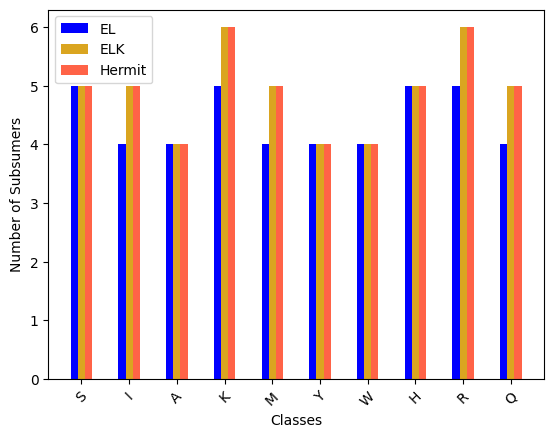

In [14]:
import matplotlib.pyplot as plt
import numpy as np

classes = list(data_EL.keys())
bar_width = 0.15 # Width of the bars
index = np.arange(len(classes))  # The x locations for the groups

# Colors in hex
darkish_yellow = '#DAA520'  # Goldenrod
softer_red = '#FF6347'  # Tomato

# Create bars
plt.bar(index, [data_EL[cls] for cls in classes], bar_width,color='blue', label='EL')
plt.bar(index + bar_width, [data_ELK[cls] for cls in classes], bar_width, color=darkish_yellow, label='ELK')
plt.bar(index + 2*bar_width, [data_Hermit[cls] for cls in classes], bar_width, color=softer_red, label='Hermit')

# Add titles and labels
plt.xlabel('Classes')
plt.ylabel('Number of Subsumers')
plt.title('')
plt.xticks(index + bar_width, classes, rotation=45)  # Rotate labels
plt.legend()

# Show the plot
plt.show()

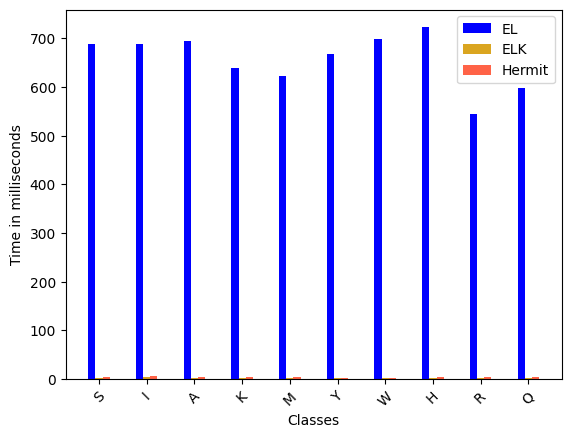

In [15]:
import matplotlib.pyplot as plt
import numpy as np

classes = list(execution_data_EL.keys())
bar_width = 0.15 # Width of the bars
index = np.arange(len(classes))  # The x locations for the groups

# Colors in hex
darkish_yellow = '#DAA520'  # Goldenrod
softer_red = '#FF6347'  # Tomato

# Create bars
plt.bar(index, [execution_data_EL[cls] for cls in classes], bar_width,color='blue', label='EL')
plt.bar(index + bar_width, [execution_data_ELK[cls] for cls in classes], bar_width, color=darkish_yellow, label='ELK')
plt.bar(index + 2*bar_width, [execution_data_Hermit[cls] for cls in classes], bar_width, color=softer_red, label='Hermit')

# Add titles and labels
plt.xlabel('Classes')
plt.ylabel('Time in milliseconds')
plt.title('')
plt.xticks(index + bar_width, classes, rotation=45)  # Rotate labels
plt.legend()

# Show the plot
plt.show()

# Time comparison

In [54]:
import time


# Your code here



In [58]:
ontology = parser.parseFile(ontology_path)

In [56]:
# get concept names
conceptNames = ontology.getConceptNames()
execution_time_per_concept = dict()

for conceptName in conceptNames:
    print(f"Computing subsumers of {formatter.format(conceptName)}")
    start_time = time.perf_counter()
    subsumers = compute_subsumers_of_class(conceptName, ontology)
    end_time = time.perf_counter()


    # Calculate elapsed time and convert to milliseconds
    elapsed_time_ms = (end_time - start_time) * 1000 
    execution_time_per_concept[formatter.format(conceptName)] = elapsed_time_ms



Computing subsumers of NamedSushi
Computing subsumers of VegetarianIngredient
Computing subsumers of Maki
Computing subsumers of Food
Computing subsumers of Raw
Computing subsumers of Vegetable
Computing subsumers of Sushi
Computing subsumers of KappaMaki
Computing subsumers of SashimiTuna
Computing subsumers of Sesame
Computing subsumers of TemakiSake
Computing subsumers of SimpleSushi
Computing subsumers of Mayonnaise
Computing subsumers of Mild
Computing subsumers of Hot
Computing subsumers of Avocado
Computing subsumers of SashimiSalmonTuna
Computing subsumers of Country
Computing subsumers of NoriSeaweed
Computing subsumers of Spiciness
Computing subsumers of Beef
Computing subsumers of InterestingSushi
Computing subsumers of Temaki
Computing subsumers of Nigiri
Computing subsumers of KaniNigiri
Computing subsumers of SesameSeads
Computing subsumers of Grain
Computing subsumers of TemakiCalifornia
Computing subsumers of MaguroNigiri
Computing subsumers of SakeNigiri
Computing subs

In [57]:
execution_time_per_concept

{'NamedSushi': 88.779917001375,
 'VegetarianIngredient': 91.42083399638068,
 'Maki': 256.3729159955983,
 'Food': 41.40991700114682,
 'Raw': 65.74316700425697,
 'Vegetable': 72.61145799566293,
 'Sushi': 54.04633400030434,
 'KappaMaki': 406.9797920019482,
 'SashimiTuna': 346.9060420029564,
 'Sesame': 88.00437500030966,
 'TemakiSake': 562.3522919995594,
 'SimpleSushi': 85.97591700527119,
 'Mayonnaise': 72.89716700324789,
 'Mild': 64.3623750002007,
 'Hot': 61.704082996584475,
 'Avocado': 76.33600000553997,
 'SashimiSalmonTuna': 427.2301669989247,
 'Country': 63.68629200005671,
 'NoriSeaweed': 63.525457997457124,
 'Spiciness': 48.97054199682316,
 'Beef': 80.18333400104893,
 'InterestingSushi': 89.1248749976512,
 'Temaki': 209.73904200218385,
 'Nigiri': 136.6770830063615,
 'KaniNigiri': 311.4928329960094,
 'SesameSeads': 72.63112499640556,
 'Grain': 62.69970900029875,
 'TemakiCalifornia': 384.7014589991886,
 'MaguroNigiri': 306.56995799654396,
 'SakeNigiri': 228.59320799761917,
 'NonVegetari

In [65]:
conceptNames = ontology.getConceptNames()
ELK_execution_time_per_concept = dict()
Hermit_execution_time_per_concept = dict()
elk = gateway.getELKReasoner() # reset reasoners
hermit = gateway.getHermiTReasoner()


for conceptName in conceptNames:
    
    

    print(f"Computing subsumers of {formatter.format(conceptName)}")
    start_time = time.perf_counter()
    elk.setOntology(ontology)
    subsumers = elk.getSubsumers(conceptName)
    end_time = time.perf_counter()
    elapsed_time_ms = (end_time - start_time) * 1000
    ELK_execution_time_per_concept[formatter.format(conceptName)] = elapsed_time_ms

    start_time = time.perf_counter()
    hermit.setOntology(ontology)
    subsumers = hermit.getSubsumers(conceptName)
    end_time = time.perf_counter()
    elapsed_time_ms = (end_time - start_time) * 1000
    Hermit_execution_time_per_concept[formatter.format(conceptName)] = elapsed_time_ms
    

Computing subsumers of NamedSushi
Computing subsumers of VegetarianIngredient
Computing subsumers of Maki
Computing subsumers of Food
Computing subsumers of Raw
Computing subsumers of Vegetable
Computing subsumers of Sushi
Computing subsumers of KappaMaki
Computing subsumers of SashimiTuna
Computing subsumers of Sesame
Computing subsumers of TemakiSake
Computing subsumers of SimpleSushi
Computing subsumers of Mayonnaise
Computing subsumers of Mild
Computing subsumers of Hot
Computing subsumers of Avocado
Computing subsumers of SashimiSalmonTuna
Computing subsumers of Country
Computing subsumers of NoriSeaweed
Computing subsumers of Spiciness
Computing subsumers of Beef
Computing subsumers of InterestingSushi
Computing subsumers of Temaki
Computing subsumers of Nigiri
Computing subsumers of KaniNigiri
Computing subsumers of SesameSeads
Computing subsumers of Grain
Computing subsumers of TemakiCalifornia
Computing subsumers of MaguroNigiri
Computing subsumers of SakeNigiri
Computing subs

In [66]:
ELK_execution_time_per_concept

{'NamedSushi': 3.230208996683359,
 'VegetarianIngredient': 2.652124996529892,
 'Maki': 4.16754100297112,
 'Food': 2.834833001543302,
 'Raw': 2.6485000053071417,
 'Vegetable': 3.2004579989006743,
 'Sushi': 2.8247919981367886,
 'KappaMaki': 2.9821669959346764,
 'SashimiTuna': 3.4141249998356216,
 'Sesame': 2.8988339981879108,
 'TemakiSake': 2.9654169993591495,
 'SimpleSushi': 2.58791699889116,
 'Mayonnaise': 2.5702089988044463,
 'Mild': 2.747790997091215,
 'Hot': 2.8083329962100834,
 'Avocado': 2.935875003458932,
 'SashimiSalmonTuna': 2.8841249950346537,
 'Country': 2.515000000130385,
 'NoriSeaweed': 2.693915994314011,
 'Spiciness': 2.6335419970564544,
 'Beef': 3.0553749966202304,
 'InterestingSushi': 2.4666250028531067,
 'Temaki': 2.486292003595736,
 'Nigiri': 2.8076660018996336,
 'KaniNigiri': 2.713125002628658,
 'SesameSeads': 2.6712499966379255,
 'Grain': 2.6635419999365695,
 'TemakiCalifornia': 2.6506249996600673,
 'MaguroNigiri': 2.5459999960730784,
 'SakeNigiri': 2.504957999917678